Primeras filas:
    Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  

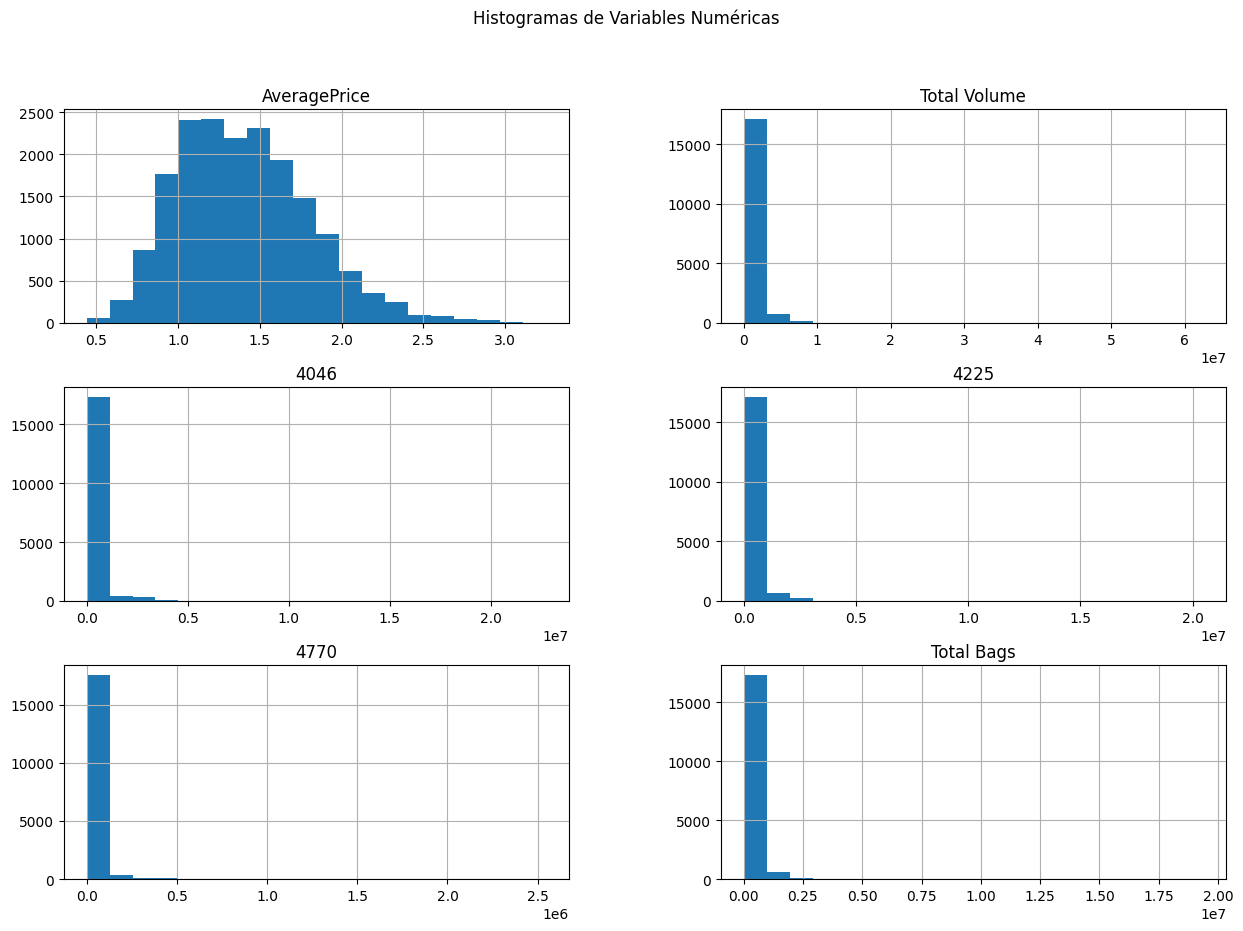

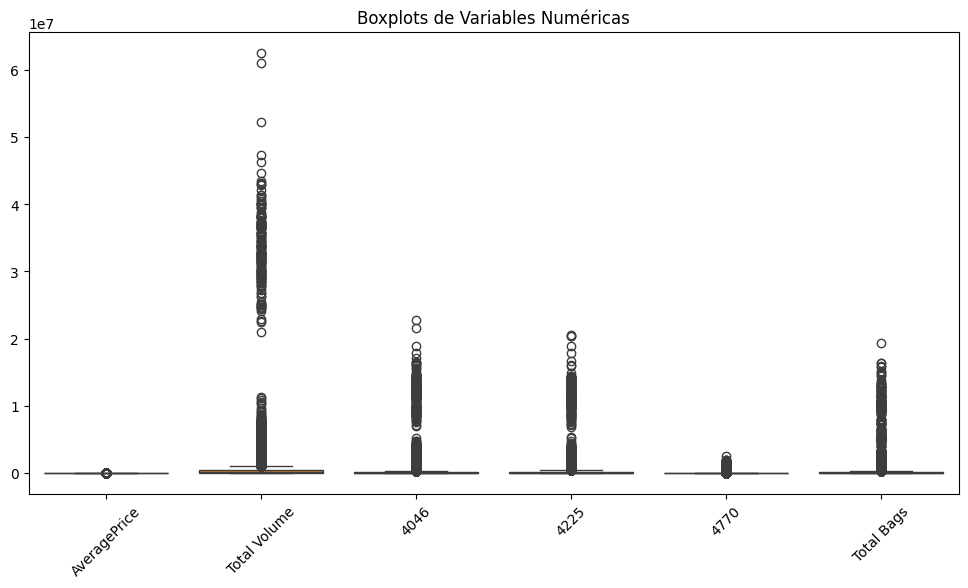

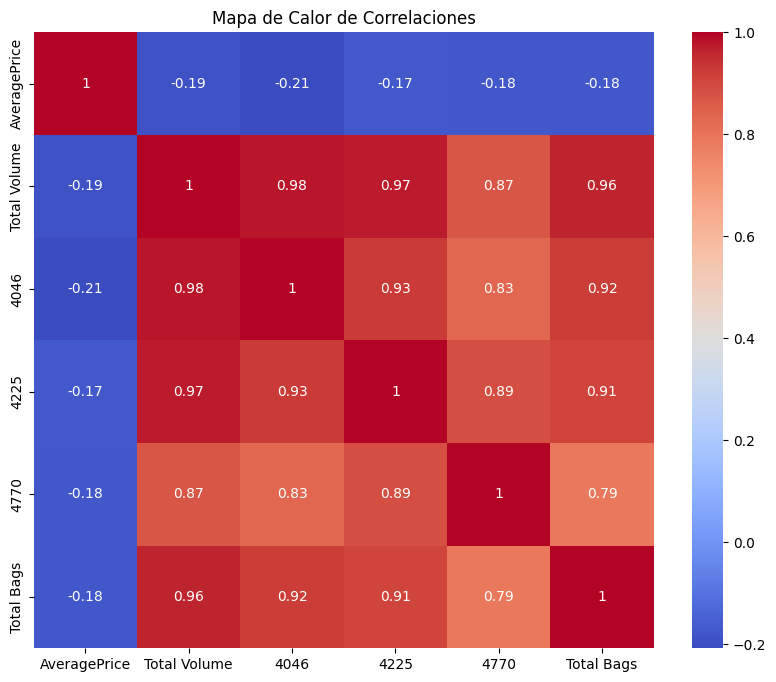

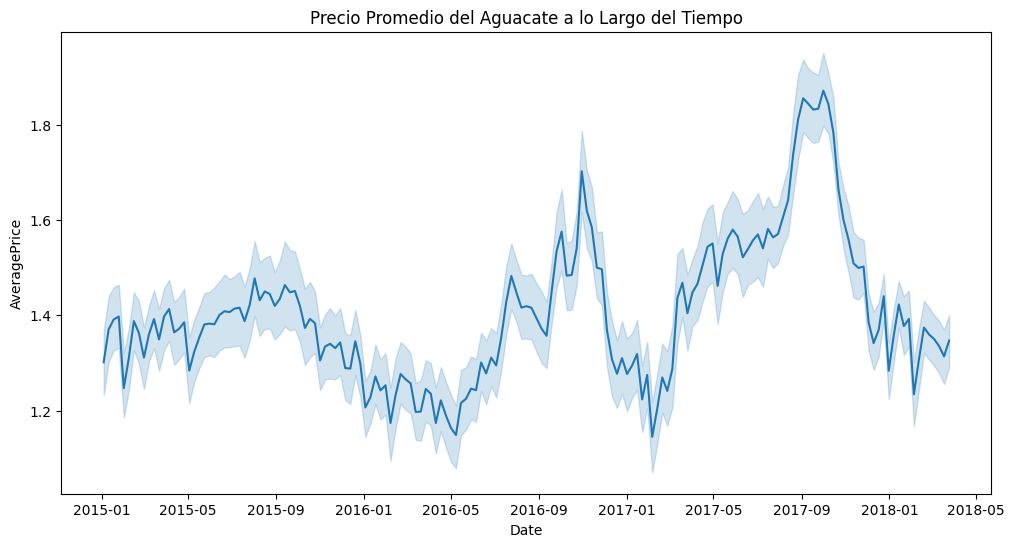

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('avocado.csv')  # Asegúrate de descargar el CSV desde Kaggle

# Exploración inicial
print("Primeras filas:\n", df.head())
print("\nInformación del dataset:\n", df.info())
print("\nEstadísticas descriptivas:\n", df.describe())

# Histogramas de variables numéricas
num_vars = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']
df[num_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

# Boxplots para outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_vars])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Heatmap de correlación
plt.figure(figsize=(10, 8))
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Evolución temporal del precio (si existe columna de fecha)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='AveragePrice', data=df)
    plt.title('Precio Promedio del Aguacate a lo Largo del Tiempo')
    plt.show()

In [2]:
# Manejo de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())
# Si hay nulos, imputar con la media o eliminar filas
# df.fillna(df.mean(), inplace=True)

# Tratamiento de outliers
Q1 = df['Total Volume'].quantile(0.25)
Q3 = df['Total Volume'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Total Volume'] >= Q1 - 1.5*IQR) & (df['Total Volume'] <= Q3 + 1.5*IQR)]

# Variables categóricas a dummies
df = pd.get_dummies(df, columns=['type', 'region'], drop_first=True)

# Normalización (ej: StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

Valores nulos por columna:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables
X = df.drop(['AveragePrice', 'Date'], axis=1, errors='ignore')
y = df['AveragePrice']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo 1: Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regresión Lineal - MSE:", mean_squared_error(y_test, y_pred_lr), "R²:", r2_score(y_test, y_pred_lr))

# Modelo 2: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest - MSE:", mean_squared_error(y_test, y_pred_rf), "R²:", r2_score(y_test, y_pred_rf))

# Modelo 3: Red Neuronal
nn = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("Red Neuronal - MSE:", mean_squared_error(y_test, y_pred_nn), "R²:", r2_score(y_test, y_pred_nn))

Regresión Lineal - MSE: 0.4547978930575764 R²: 0.5634445272725204
Random Forest - MSE: 0.09311272593924867 R²: 0.9106221231235851
Red Neuronal - MSE: 1069.8681528833918 R²: -1025.954619552198
